In [1]:
import random
import time
from datetime import datetime, timedelta
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS

In [2]:
url = "http://localhost:8086"
token = "YyDc_H6-Jo3415kJ11q7sNVa0iJRYUMys2lv4p-elRZEFZvMdD66mlMSzoctYtqwYvdscXNVkHfn7Eay_aw3ew=="
org = "myOrg"
bucket = "scriptP"

client = InfluxDBClient(url=url, token=token, org=org)


In [3]:
start_time = datetime(2023, 1, 1, 0, 0, 0, 0)
end_time = datetime.utcnow()

write_api = client.write_api(write_options=SYNCHRONOUS)

In [4]:
time_delta = timedelta(hours=3)
current_time = start_time
count = 0.0

slope = 0.5
intercept = 10


capteurs = ["capteur1","capteur2","capteur3"]
tem_eau = []
haut_mar = []
tem_air = []

In [5]:
while current_time < end_time:
    for i in range(len(capteurs)):
        temperature_eau = random.uniform(-5, 5)
        hauteur_maree = random.uniform(0, 2)
        temperature_air = temperature_eau * slope + intercept + temperature_eau
        temperature_air += random.uniform(-2, 2)
        
        tem_eau.append(temperature_eau)
        haut_mar.append(hauteur_maree)
        tem_air.append(temperature_air)
        data_point1 = Point("airSensors") \
            .tag("sensor_id", capteurs[i]) \
            .field("temperature_air", temperature_air) \
            .field("temperature_eau", temperature_eau) \
            .field("hauteur_maree", hauteur_maree) \
            .time(current_time)
        
  
        write_api.write(bucket=bucket, org=org, record=data_point1)

    
    current_time += time_delta

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relation Témperature Eau avec Temperature Air')

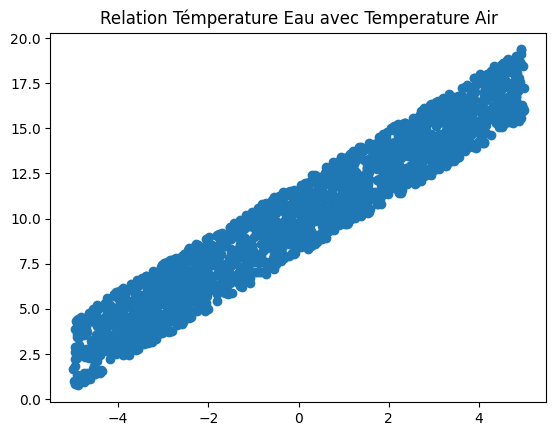

In [7]:
plt.scatter(tem_eau,tem_air)
plt.title("Relation Témperature Eau avec Temperature Air")

Text(0.5, 1.0, 'Relation hauteur marre  avec Temperature Air')

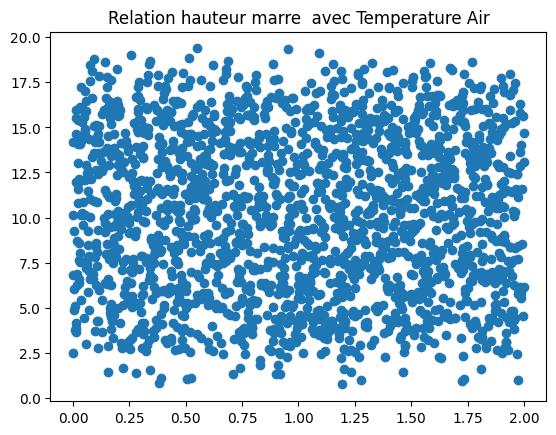

In [8]:
plt.scatter(haut_mar,tem_air)
plt.title("Relation hauteur marre  avec Temperature Air")

Text(0.5, 1.0, 'Relation Témperature Eau avec Temperature Air')

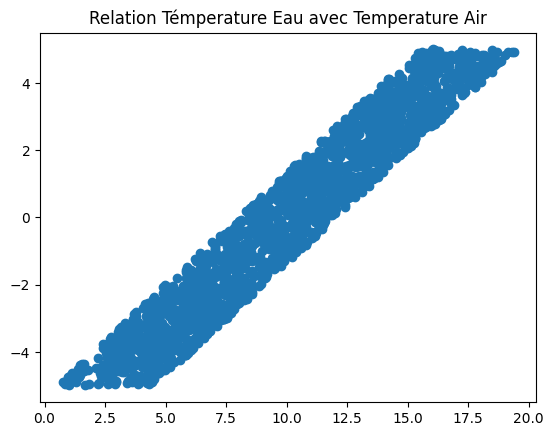

In [14]:
plt.scatter(tem_air,tem_eau)
plt.title("Relation Témperature Eau avec Temperature Air")

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = [haut_mar, ]
reg = LinearRegression().fit(X, y)

In [33]:
X = np.array([tem_air,haut_mar]).T
y = np.array(tem_eau).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

In [34]:
print("Intercept:", reg.intercept_)
print("Slope (hauteur_maree):", reg.coef_[0][0])
print("Slope (temperature_eau):", reg.coef_[0][1])

Intercept: [-6.28791774]
Slope (hauteur_maree): 0.6288383268424249
Slope (temperature_eau): -0.005580106713436632


In [35]:
preds = reg.predict(X[:10])

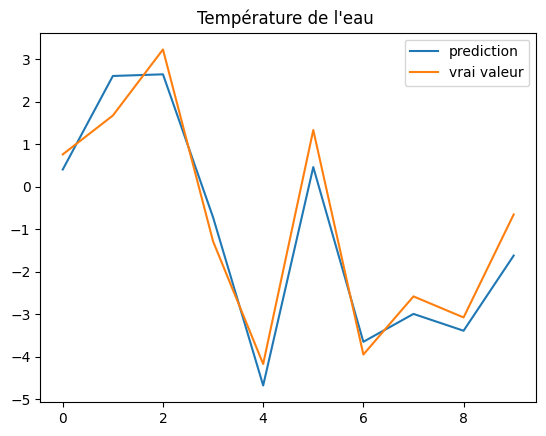

In [40]:
plt.plot(range(len(preds)),preds,label="prediction")
plt.plot(range(len(preds)),y[:10],label="vrai valeur")
plt.title("Température de l'eau ")
plt.legend()
plt.show()

In [31]:
reg.evaluate(X,y)

AttributeError: 'LinearRegression' object has no attribute 'evaluate'

In [12]:
import joblib
joblib.dump(reg, 'model.joblib')

['model.joblib']

In [13]:
# Load the saved model from a file
reg = joblib.load('model.joblib')